In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

In [2]:
import DataStore

ds = DataStore.DataStore("data", 20)

In [3]:
ds.trainData['A-3'].x[2056]

array([[0.11308108, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.3336605 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.3336605 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.

In [4]:
ds.trainData['A-3'].y[2056]

array([0.54907948, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [23]:
loaded_model = tf.keras.models.load_model('models/experimental/A-1.h5')

In [6]:
loaded_model.layers

In [7]:
ds.testData['A-3'].x[0]

array([[ 0.40241647,  1.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.20466603,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.40241647,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0

In [8]:
ds.testData['A-3'].y[0]

array([-0.58728924,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [9]:
preds = loaded_model.predict(ds.testData['A-3'].x)

In [10]:
preds

array([[[-4.77532983e-01,  7.56507216e-05, -1.62786455e-06, ...,
          2.54242739e-04, -4.69942825e-05, -4.98998910e-04],
        [-4.69148874e-01,  8.23684095e-05,  5.09329402e-06, ...,
          2.63120397e-04, -4.14792958e-05, -4.96907160e-04],
        [-4.71725464e-01,  8.10790225e-05,  6.37243647e-06, ...,
          2.64394446e-04, -3.99910132e-05, -4.97225265e-04],
        ...,
        [-4.70279634e-01,  8.11740465e-05,  7.86548480e-06, ...,
          2.66138784e-04, -3.98789562e-05, -4.96638182e-04],
        [-4.70279992e-01,  8.11738428e-05,  7.86499004e-06, ...,
          2.66138843e-04, -3.98787452e-05, -4.96638357e-04],
        [-4.70280170e-01,  8.11739010e-05,  7.86482269e-06, ...,
          2.66138959e-04, -3.98785414e-05, -4.96638473e-04]],

       [[-5.16196489e-01,  6.56642660e-05, -1.35859591e-06, ...,
          2.69952056e-04, -3.34059660e-05, -5.11179736e-04],
        [-5.09319305e-01,  7.00312958e-05,  5.63094363e-06, ...,
          2.77602492e-04, -2.75595594e

In [11]:
y = ds.testData['A-3'].y

In [12]:
from Utils import get_e, rmse, mae, classify_pl, make_discrete_lbls, vectorize_labels
import os



In [15]:
lbls = make_discrete_lbls(os.path.join("data", "labeled_anomalies.csv"))
lbls['A-3']

[(4575, 4760)]

In [16]:
pls = classify_pl(preds, y, 100)

In [21]:
e = []
for i,j in zip(y, preds):
    e.append(rmse(i,j))
e = np.array(e)

In [27]:
lb = vectorize_labels(lbls['M-3'], preds.shape[0])

In [18]:
import matplotlib.pyplot as plt


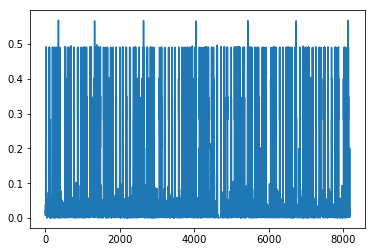

In [22]:
plt.plot(e)

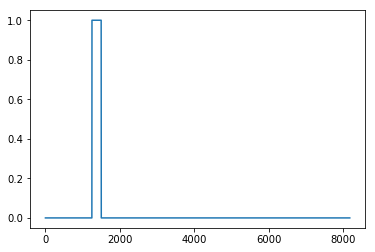

In [28]:
plt.plot(lb)

In [ ]:
pld.l.plot()

In [ ]:
tst = np.abs(ds.testData['A-1'].y[0] - preds[0])

In [ ]:
tst > .14146

In [ ]:
s = True*20

In [ ]:
s

In [ ]:
t = np.ones((100,1))*False

In [ ]:
t[-11:-1]

In [ ]:
for p in preds:
    print(p)